In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv')

In [25]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [26]:
df = df.drop(columns=['CUST_ID', 'TENURE'])

In [27]:
df.shape

(8950, 16)

In [28]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [29]:
df = df.fillna(df.median())

In [30]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [31]:
values = Normalizer().fit_transform(df.values)

In [32]:
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [33]:
cluster = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = cluster.fit_predict(values)

## Coeficiente de Silhouette


### Exemplo:
|   | $x$ | $y$ | 
|---|---|---|
| A | 1,0 | 0,9 |
| B | 1,0 | 1,7 |
| C | 1,3 | 1,5 |
| D | 1,3 | 3,9 |
| E | 1,5 | 4,3 |
| F | 1,6 | 3,7 |
| G | 2,1 | 0,8 |
| H | 2,2 | 1,5 |
| I | 2,5 | 0,9 |

$a$: distância média entre o ponto e todos os outros pontos do mesmo cluster.

$b$: distância média entre o ponto e todos os outros pontos do cluster mais próximo.

$s=\frac{b-a}{max(a,b)}$: Coeficiente de Silhouette

$d(A, B)=\sqrt{(x_B-x_A)^2\space+\space(y_B-y_A)^2}$: Distância Euclidiana

### Exemplo de um ponto

$d(A, B)=\sqrt{(1-1)^2\space+\space(1,7-0,9)^2}$

$d(A, B)=\sqrt{0\space+\space0,8^2}$

$d(A, B)= 0,8$

$d(A, C)=\sqrt{(x_C-x_A)^2\space+\space(y_C-y_A)^2}$

$d(A, C)=\sqrt{(1,3-1)^2\space+\space(1,5-0,9)^2}$

$d(A, C)=\sqrt{0,3^2\space+\space0,6^2}$

$d(A, C)=\sqrt{0,9\space+\space0,36}$

$d(A, C)=\sqrt{1,26}$

$d(A, C)=1,12$

$a = \frac{0,8\space+\space1,12}{2}$

$a = 0,96$

$d(A, D)=3,01$

$d(A, E)=3,43$

$d(A, F)=2,86$

$\frac{3,01+3,43,2,86}{3}$

$3,1$

$d(A, G)=1,10$

$d(A, H)=1,34$

$d(A, I)=1,5$

$\frac{1,10+1,34+1,5}{3}$

$1,31$

$b = max(3.1, 1.31)$

$b=3$

$s=\frac{1.31\space-\space0.96}{max(0.96\space,\space1.31)}$

$s=0,26$

In [34]:
labels = cluster.labels_
silhouette = silhouette_score(values, labels, metric='euclidean')

In [35]:
print(silhouette)

0.36451198422831005


## Índice Davies-Bouldin
$S$ distância média entre cada ponto do cluster e seu centroide.

$d$ distância entre os centroides dos clusters

$k$ número de clusters

$R_{ij}=\frac{S_i+S_j}{d_{id}}$ Medida de similaridade entre dois clusters i e j

$DB = \frac{1}{k}\sum^k_{i=1}maxR_{ij}$

In [36]:
dbs = davies_bouldin_score(values, labels)

In [37]:
dbs

1.0754963863506781

## Índice Calinski-Harabasz

$$s=\frac{tr(B_k)}{tr(W_k)}\times\frac{n_E-k}{k-1}$$

$$W_k=\sum^k_{q=1}\sum_{x\in{C_q}}{(x-c_q)(x-c_q)^T}$$

$$B_k=\sum^k_{q=1}n_q(c_q-c_E)(c_q-c_E)^T$$

$n_E$ número de elementos

$k$ número de clusters

$q$ clusters

$n_q$ número de elementos no cluster

$c_q$ centroide do cluster

$c_E$ centroide dos elementos

$B_k$ dispersão dos elementos entre(between) clusters

$W_k$ dispersão dos elementros dentro(within) do cluster

In [38]:
calinski = calinski_harabasz_score(values, labels)
calinski

3431.79476705023

In [39]:
def clustering_algorithm(n_clusters, dataset, init=2, step=1):
    for i in range(init, n_clusters+1, step):
        kmeans = KMeans(n_clusters=i, n_init=10, max_iter=300)
        y_pred = kmeans.fit_predict(dataset)
        s = silhouette_score(dataset, y_pred, metric='euclidean')
        dbs = davies_bouldin_score(dataset, y_pred)
        calinski = calinski_harabasz_score(dataset, y_pred)
        zeros = (len(str(n_clusters))-len(str(i)))*'0'
        print(f'[{zeros+str(i)}] clusters: {(s, dbs, calinski)}')
    

In [40]:
clustering_algorithm(30, values, step=4)

[02] clusters: (0.299120584574369, 1.5180495541723618, 3321.8449928790496)
[06] clusters: (0.36485403763051477, 1.045142371684901, 3523.514240666069)
[10] clusters: (0.3514711453556206, 1.1151139480069656, 3019.1516587100546)
[14] clusters: (0.2992883114510331, 1.1567910934768402, 2762.2383160881504)
[18] clusters: (0.2702848406155384, 1.208070696517046, 2507.0819621744786)
[22] clusters: (0.27540527847998914, 1.2039958059665161, 2310.672826629563)
[26] clusters: (0.27276886404613987, 1.1929734908918532, 2160.829099484946)
[30] clusters: (0.27495804305158084, 1.201971689800961, 2028.3935246601723)


In [41]:
random_data = np.random.rand(df.shape[0], df.shape[1])

In [42]:
clustering_algorithm(30, random_data, step=4)

[02] clusters: (0.04789273097904866, 4.4115127820908295, 453.47064381159845)
[06] clusters: (0.03925593777917893, 3.3481120940683398, 280.1344316433388)
[10] clusters: (0.040517188556782734, 2.9379308572088165, 224.04680463092106)
[14] clusters: (0.04161571862078226, 2.720351955016427, 190.13055031657652)
[18] clusters: (0.04233729309004903, 2.643731449473548, 166.8694371137932)
[22] clusters: (0.04357285668145198, 2.5813675947549335, 151.32894565863216)
[26] clusters: (0.04414650897265103, 2.5115953102085324, 137.54582435757413)
[30] clusters: (0.04494951658426117, 2.4899252858426726, 126.90795762841852)


In [47]:
# Verificando estabilidade

In [43]:
set1, set2, set3 = np.array_split(values, 3)

In [44]:
clustering_algorithm(30, set1, step=4)

[02] clusters: (0.29868497231188856, 1.4991300464407298, 1121.5028307537264)
[06] clusters: (0.3642158840603263, 1.022583625615647, 1192.388843217558)
[10] clusters: (0.32256641755971327, 1.092788925421727, 1034.4660045396877)
[14] clusters: (0.2953918505879031, 1.1064766321081085, 962.6532889293057)
[18] clusters: (0.2902280314072301, 1.1813984875287544, 875.1254272140452)
[22] clusters: (0.26839538183011014, 1.210065433139622, 801.2612446936353)
[26] clusters: (0.2610341387992312, 1.236773684114606, 745.0897839691033)
[30] clusters: (0.262598147284941, 1.2445573903229044, 702.4671754725513)


In [45]:
clustering_algorithm(30, set2, step=4)

[02] clusters: (0.3050535616754163, 1.484574931099915, 1152.4177997570062)
[06] clusters: (0.3649075167575799, 1.0609702482848762, 1169.4837362814299)
[10] clusters: (0.313772781101971, 1.1640894042374694, 993.8269249514035)
[14] clusters: (0.2883572258696302, 1.1706787584281415, 906.3626073522221)
[18] clusters: (0.28881328420600433, 1.16627867758407, 821.346557850632)
[22] clusters: (0.26012007776293855, 1.2548879082816449, 759.791063947548)
[26] clusters: (0.2683347115074811, 1.2216687833880584, 711.0350570556719)
[30] clusters: (0.2739587091499356, 1.201382743477933, 677.2436018645145)


In [46]:
clustering_algorithm(30, set3, step=4)

[02] clusters: (0.3029349930763123, 1.5310780789150227, 1096.432345057052)
[06] clusters: (0.3722808730515616, 1.0415357242295302, 1184.7946373926359)
[10] clusters: (0.31338660907634525, 1.1478781122725907, 1053.8709191052394)
[14] clusters: (0.30182409628140106, 1.1827227628460695, 936.1485181675337)
[18] clusters: (0.28077811714737644, 1.2294196268700108, 847.872195855371)
[22] clusters: (0.2638357641292488, 1.2577362394027154, 775.7282452074847)
[26] clusters: (0.2721940890381688, 1.2434588855564905, 734.1859582276317)
[30] clusters: (0.2515785077192404, 1.2470558634094073, 683.1936167460638)


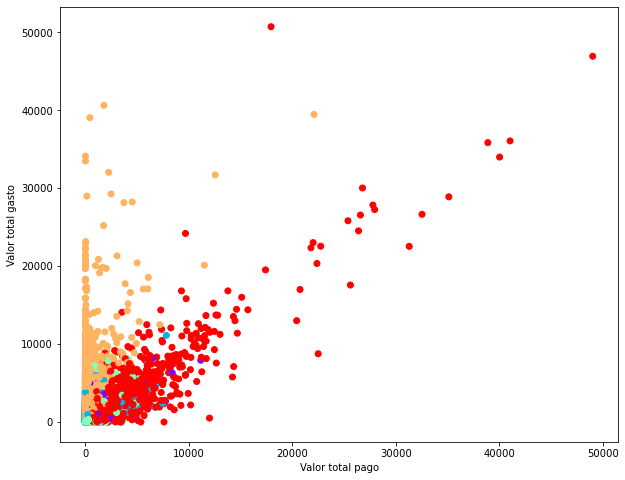

In [52]:
plt.figure(figsize=(10,8))
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c=labels, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')
plt.show();

In [54]:
df['cluster'] = labels 

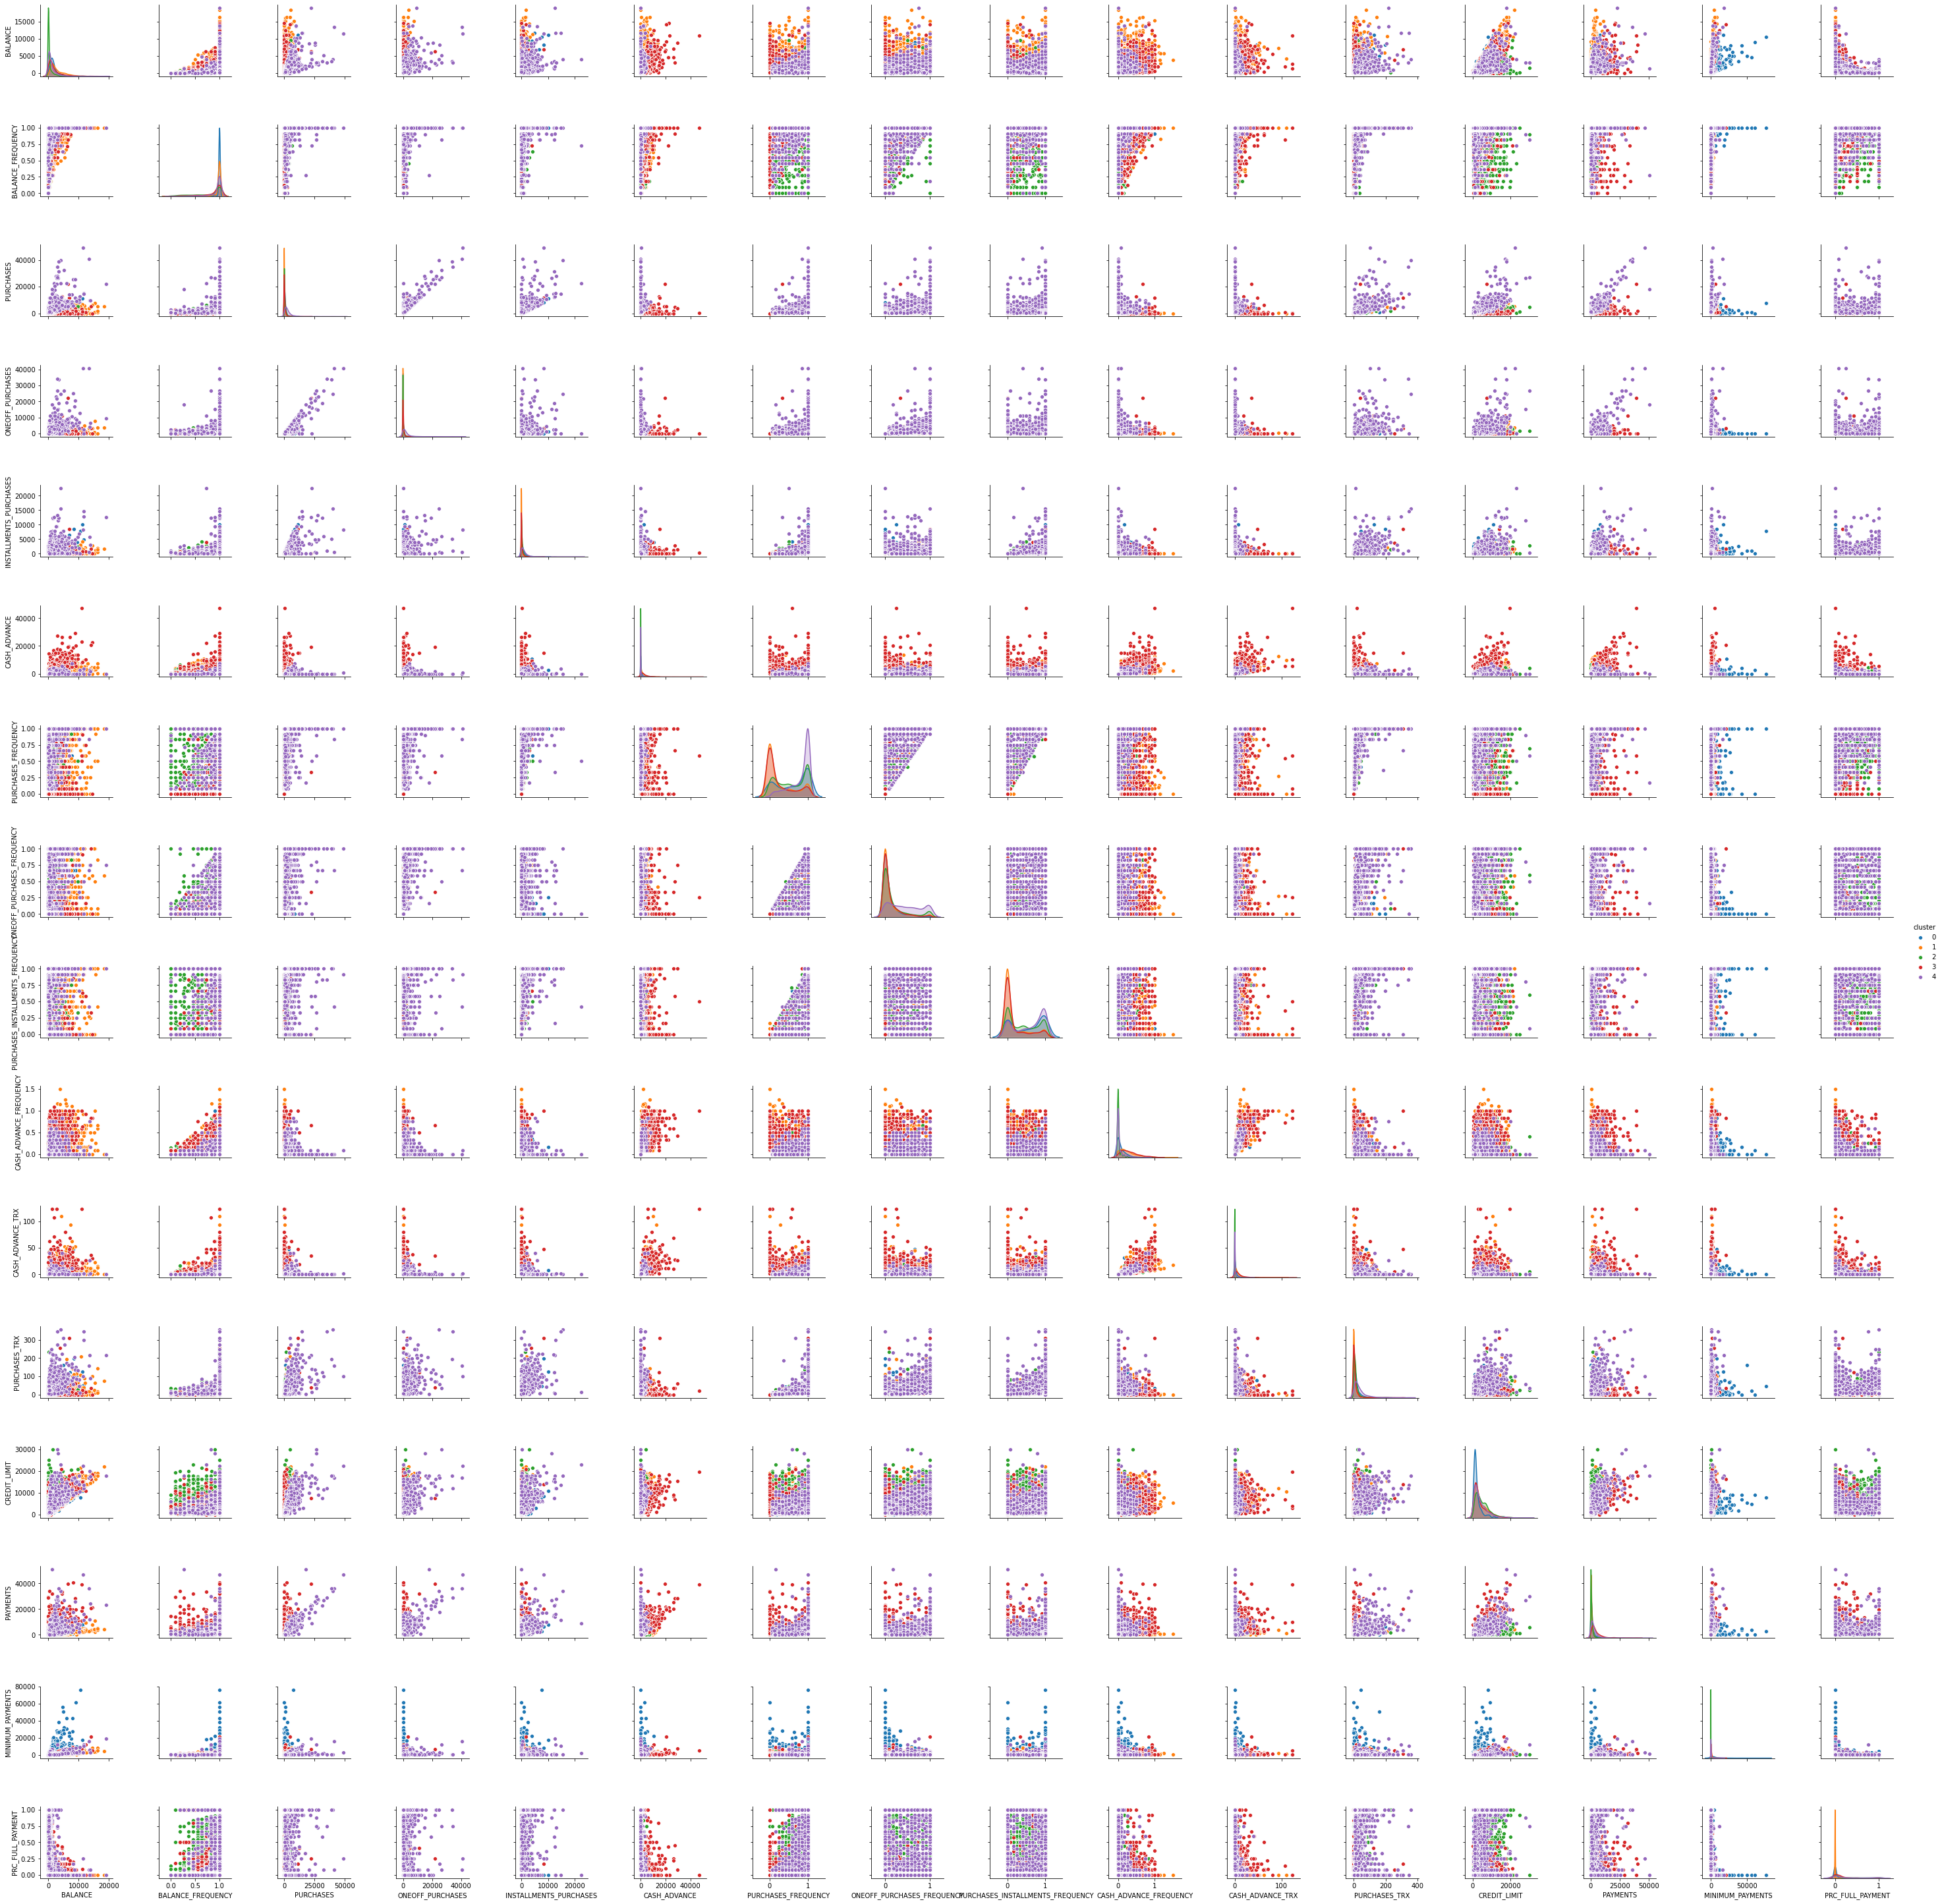

In [55]:
sns.pairplot(df, hue='cluster');

In [57]:
df.groupby('cluster').describe()['BALANCE']

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,412.0,1987.146873,1852.215743,70.794108,1020.146724,1338.918346,2133.415063,11670.179850
1,2648.0,3038.132314,2479.290949,6.824905,1256.126442,2173.994774,4224.605542,18495.558550
2,3281.0,443.767052,846.269966,0.000000,23.390230,82.980060,411.727643,9630.367575
3,1071.0,1795.836702,1983.632225,0.000000,506.773698,1088.056301,2317.702916,14581.459140
4,1538.0,1143.712630,1664.669654,0.000000,212.513230,555.745265,1371.943854,19043.138560


In [58]:
centroides = cluster.cluster_centers_
print(centroides)

[[3.32972556e-01 2.68240066e-04 1.58923673e-01 3.62178588e-02
  1.23089552e-01 5.82140753e-02 1.66817881e-04 2.64295391e-05
  1.47135264e-04 1.92748591e-05 4.26896159e-04 3.86195702e-03
  3.76646957e-01 2.52402941e-01 6.79571553e-01 4.22964707e-06]
 [5.04231090e-01 2.72311689e-04 6.17321425e-02 3.62269020e-02
  2.55269536e-02 2.52702410e-01 6.72689504e-05 2.56975193e-05
  4.50239293e-05 5.74188452e-05 1.15642722e-03 1.33088960e-03
  7.19333925e-01 1.66164378e-01 1.79180227e-01 5.52303554e-07]
 [6.90369837e-02 2.30747843e-04 1.21558127e-01 4.80177986e-02
  7.36405575e-02 2.43744860e-02 1.72888010e-04 3.36935793e-05
  1.40328311e-04 7.92842100e-06 1.24221608e-04 2.86441055e-03
  9.43534735e-01 1.53880057e-01 5.68368905e-02 7.61592997e-05]
 [2.35481987e-01 2.16532182e-04 6.00600804e-02 3.39871776e-02
  2.60781223e-02 4.00599972e-01 5.26908300e-05 2.04104938e-05
  3.53115349e-05 6.55611402e-05 1.57284062e-03 1.12114713e-03
  5.34945073e-01 5.97780714e-01 1.04603362e-01 2.77383565e-05]
 [1.

In [83]:
tam = centroides[0].shape[0]
colunas = []
for i in range(tam):
    print(f'{df.columns.values[i]}\n{centroides[:, i].var()}\n')
    if centroides[:, i].var() > 0.009:
        colunas.append(df.columns.values[i])

BALANCE
0.02241253607812424

BALANCE_FREQUENCY
4.57398588053743e-10

PURCHASES
0.019658291671787547

ONEOFF_PURCHASES
0.007669541092171097

INSTALLMENTS_PURCHASES
0.0035735837334472977

CASH_ADVANCE
0.022578410669131542

PURCHASES_FREQUENCY
3.7152009095537157e-09

ONEOFF_PURCHASES_FREQUENCY
6.424727223501602e-10

PURCHASES_INSTALLMENTS_FREQUENCY
2.70644152959914e-09

CASH_ADVANCE_FREQUENCY
6.048977539725005e-10

CASH_ADVANCE_TRX
3.3124731013702075e-07

PURCHASES_TRX
3.423149709214558e-06

CREDIT_LIMIT
0.0360067013530587

PAYMENTS
0.0279432980708349

MINIMUM_PAYMENTS
0.0541944828558026

PRC_FULL_PAYMENT
1.0472940392065465e-09



In [92]:
description = df.groupby('cluster')[colunas]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1987.146873   858.326286    420.107194   2226.699029  1338.974045   
1        3038.132314   385.096760   1636.114441   4496.336858   968.599396   
2         443.767052   629.212624    141.652025   5129.746043   814.456295   
3        1795.836702   470.954463   3272.160223   3975.416631  4704.149015   
4        1143.712630  3274.692952    186.045097   4103.875261  3046.004076   

         MINIMUM_PAYMENTS  n_clients  
cluster                               
0             6032.349113        412  
1             1021.861431       2648  
2              228.508769       3281  
3              735.583216       1071  
4              541.711158       1538  


CLUSTER 0: Clientes com os menores valores em gastos e menor valor em saques, maior limite de crédito

CLUSTER 1: Clientes com os maiores valores em gastos e menor valor em compras.

CLUSTER 2: Maior valor em compras, muito distante dos demais.

CLUSTER 3: Maior valor em saques.

CLUSTER 4: menor limite de crédito
